In [1]:
import cv2
import os
import numpy as np
import shutil  # Import the shutil module for removing directories


In [7]:
#working 2
import cv2
import os
import numpy as np
import shutil  # Import the shutil module for removing directories

def crop_and_resize(image, target_size=(35, 35), additional_border=50):
    # Calculate the center of mass of the binary image
    M = cv2.moments(image)
    if M["m00"] == 0:
        return None
    
    center_x = int(M["m10"] / M["m00"])
    center_y = int(M["m01"] / M["m00"])

    # Calculate the crop region with additional border
    crop_x = max(0, center_x - target_size[0] // 2 - additional_border)
    crop_y = max(0, center_y - target_size[1] // 2 - additional_border)
    crop_x_end = min(image.shape[1], crop_x + target_size[0] + 2 * additional_border)
    crop_y_end = min(image.shape[0], crop_y + target_size[1] + 2 * additional_border)

    # Crop and resize the image
    cropped_image = image[crop_y:crop_y_end, crop_x:crop_x_end]
    cropped_image = cv2.resize(cropped_image, target_size)

    return cropped_image

def recrop_zoomed_image(image, recrop_size=(512, 512)):
    # Calculate the center of the zoomed image
    center_x = image.shape[1] // 2
    center_y = image.shape[0] // 2

    # Calculate the recrop region
    recrop_x = max(0, center_x - recrop_size[0] // 2)
    recrop_y = max(0, center_y - recrop_size[1] // 2)
    recrop_x_end = min(image.shape[1], recrop_x + recrop_size[0])
    recrop_y_end = min(image.shape[0], recrop_y + recrop_size[1])

    # Recrop the image
    recropped_image = image[recrop_y:recrop_y_end, recrop_x:recrop_x_end]

    return recropped_image

def zoom_and_save(image, zoom_factor=100.0, output_path=""):
    # Resize the image to zoom in
    zoomed_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

    # Recrop the zoomed image
    recropped_image = recrop_zoomed_image(zoomed_image)

    # Save the recropped zoomed image
    cv2.imwrite(output_path, recropped_image)

def binarize_images_in_folder(folder_path, output_path):
    # Permanently delete existing subfolders in the output path
    shutil.rmtree(output_path, ignore_errors=True)
    print(f"Removed existing subfolders in '{output_path}'.")

    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return

    for root, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                image_path = os.path.join(root, file_name)
                relative_path = os.path.relpath(root, folder_path)
                output_subfolder = os.path.join(output_path, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)

                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    # Apply adaptive thresholding with Gaussian mean to enhance character features
                    binary_image = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                         cv2.THRESH_BINARY_INV, 11, 2)

                    # Perform morphological operations for noise suppression
                    kernel_open = np.ones((3, 3), np.uint8)
                    kernel_close = np.ones((5, 5), np.uint8)

                    # Opening operation to remove small white regions
                    binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_open)

                    # Closing operation to fill in small gaps between characters
                    binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel_close)

                    # Dilation to fill in missing pixel values between characters
                    kernel_dilate = np.ones((3, 3), np.uint8)
                    binary_image = cv2.dilate(binary_image, kernel_dilate, iterations=1)

                    # Set border pixels to black
                    binary_image[:10, :] = 0  # top border
                    binary_image[-10:, :] = 0  # bottom border
                    binary_image[:, :10] = 0  # left border
                    binary_image[:, -10:] = 0  # right border

                    # Erode the image to remove single-pixel white values
                    kernel_erode = np.ones((2, 2), np.uint8)
                    binary_image = cv2.erode(binary_image, kernel_erode, iterations=1)

                    # Crop and resize the image
                    cropped_image = crop_and_resize(binary_image)

                    # Zoom and save the processed image
                    zoom_and_save(cropped_image, zoom_factor=2.0, output_path=os.path.join(output_subfolder, f"{relative_path}_{file_name}"))

                    print(f"{file_name} processed and saved with zoom and recrop")
                else:
                    print(f"Could not read {file_name}")

folder_with_images = r"C:\Amrita\Semester3\Mini_Project\final images"
output_path = r"C:\Amrita\Semester3\Mini_Project\aug_preprocessed_images_without_threshold"
binarize_images_in_folder(folder_with_images, output_path)


Removed existing subfolders in 'C:\Amrita\Semester3\Mini_Project\aug_preprocessed_images_without_threshold'.
100_character60.jpg processed and saved with zoom and recrop
101_character60.png processed and saved with zoom and recrop
102_character60.png processed and saved with zoom and recrop
10_character60.png processed and saved with zoom and recrop
11_character65.jpg processed and saved with zoom and recrop
12_character60.jpg processed and saved with zoom and recrop
13_character60.jpg processed and saved with zoom and recrop
14_character60.jpg processed and saved with zoom and recrop
15_character50.jpg processed and saved with zoom and recrop
16_character130.png processed and saved with zoom and recrop
17_character137.png processed and saved with zoom and recrop
18_character60.jpg processed and saved with zoom and recrop
19_character51.jpg processed and saved with zoom and recrop
1_character60.jpg processed and saved with zoom and recrop
20_character60.png processed and saved with zoo

67_character59.png processed and saved with zoom and recrop
68_character60.jpg processed and saved with zoom and recrop
69_character59.jpg processed and saved with zoom and recrop
6_character59.jpg processed and saved with zoom and recrop
70_character59.jpg processed and saved with zoom and recrop
71_character59.jpg processed and saved with zoom and recrop
72_character62.jpg processed and saved with zoom and recrop
73_character59.jpg processed and saved with zoom and recrop
74_character59.jpg processed and saved with zoom and recrop
75_character59.jpg processed and saved with zoom and recrop
76_character59.jpg processed and saved with zoom and recrop
77_character61.jpg processed and saved with zoom and recrop
78_character62.jpg processed and saved with zoom and recrop
79_character59.jpg processed and saved with zoom and recrop
7_character59.png processed and saved with zoom and recrop
80_character59.jpg processed and saved with zoom and recrop
81_character59.jpg processed and saved wit

48_character57.jpg processed and saved with zoom and recrop
49_character57.jpg processed and saved with zoom and recrop
4_character57.jpg processed and saved with zoom and recrop
53_character57.jpg processed and saved with zoom and recrop
54_character57.jpg processed and saved with zoom and recrop
55_character57.jpg processed and saved with zoom and recrop
56_character89.jpg processed and saved with zoom and recrop
57_character57.png processed and saved with zoom and recrop
58_character133.png processed and saved with zoom and recrop
59_character39.jpg processed and saved with zoom and recrop
5_character57.jpg processed and saved with zoom and recrop
60_character57.jpg processed and saved with zoom and recrop
61_character40.jpg processed and saved with zoom and recrop
62_character57.jpg processed and saved with zoom and recrop
63_character57.jpg processed and saved with zoom and recrop
64_character57.jpg processed and saved with zoom and recrop
65_character57.jpg processed and saved wi

53_character53.jpg processed and saved with zoom and recrop
54_character55.jpg processed and saved with zoom and recrop
55_character55.jpg processed and saved with zoom and recrop
56_character83.jpg processed and saved with zoom and recrop
58_character55.png processed and saved with zoom and recrop
59_character30.jpg processed and saved with zoom and recrop
5_character55.jpg processed and saved with zoom and recrop
60_character55.png processed and saved with zoom and recrop
61_character34.jpg processed and saved with zoom and recrop
62_character55.png processed and saved with zoom and recrop
63_character55.png processed and saved with zoom and recrop
64_character55.jpg processed and saved with zoom and recrop
65_character55.jpg processed and saved with zoom and recrop
66_character58.jpg processed and saved with zoom and recrop
67_character55.jpg processed and saved with zoom and recrop
68_character56.jpg processed and saved with zoom and recrop
69_character53.jpg processed and saved wi

122_character50.jpg processed and saved with zoom and recrop
122_character51.jpg processed and saved with zoom and recrop
122_character52.jpg processed and saved with zoom and recrop
12_character51.jpg processed and saved with zoom and recrop
13_character53.jpg processed and saved with zoom and recrop
14_character53.jpg processed and saved with zoom and recrop
15_character44.jpg processed and saved with zoom and recrop
16_character34.jpg processed and saved with zoom and recrop
17_character39.jpg processed and saved with zoom and recrop
18_character53.jpg processed and saved with zoom and recrop
19_character44.jpg processed and saved with zoom and recrop
1_character53.jpg processed and saved with zoom and recrop
20_character48.jpg processed and saved with zoom and recrop
21_character64.jpg processed and saved with zoom and recrop
22_character132.png processed and saved with zoom and recrop
23_character47.jpg processed and saved with zoom and recrop
24_character134.png processed and sav

18_character51.jpg processed and saved with zoom and recrop
19_character46.jpg processed and saved with zoom and recrop
1_character51.jpg processed and saved with zoom and recrop
20_character49.jpg processed and saved with zoom and recrop
21_character122.png processed and saved with zoom and recrop
22_character43.jpg processed and saved with zoom and recrop
23_character49.jpg processed and saved with zoom and recrop
25_character45.jpg processed and saved with zoom and recrop
26_character48.jpg processed and saved with zoom and recrop
28_character53.jpg processed and saved with zoom and recrop
2_character51.jpg processed and saved with zoom and recrop
30_character51.jpg processed and saved with zoom and recrop
31_character51.jpg processed and saved with zoom and recrop
32_character35.jpg processed and saved with zoom and recrop
33_character57.jpg processed and saved with zoom and recrop
34_character51.jpg processed and saved with zoom and recrop
36_character141.png processed and saved w

69_character47.jpg processed and saved with zoom and recrop
6_character50.jpg processed and saved with zoom and recrop
70_character50.jpg processed and saved with zoom and recrop
71_character50.jpg processed and saved with zoom and recrop
72_character53.jpg processed and saved with zoom and recrop
73_character49.jpg processed and saved with zoom and recrop
74_character50.jpg processed and saved with zoom and recrop
75_character50.jpg processed and saved with zoom and recrop
76_character46.jpg processed and saved with zoom and recrop
77_character48.jpg processed and saved with zoom and recrop
78_character46.jpg processed and saved with zoom and recrop
79_character46.jpg processed and saved with zoom and recrop
7_character50.jpg processed and saved with zoom and recrop
80_character48.jpg processed and saved with zoom and recrop
81_character50.jpg processed and saved with zoom and recrop
82_character87.jpg processed and saved with zoom and recrop
83_character50.jpg processed and saved wit

28_character133.png processed and saved with zoom and recrop
2_character43.jpg processed and saved with zoom and recrop
30_character43.jpg processed and saved with zoom and recrop
31_character43.jpg processed and saved with zoom and recrop
32_character137.png processed and saved with zoom and recrop
33_character44.jpg processed and saved with zoom and recrop
34_character43.jpg processed and saved with zoom and recrop
38_character141.png processed and saved with zoom and recrop
39_character43.jpg processed and saved with zoom and recrop
3_character43.jpg processed and saved with zoom and recrop
41_character39.jpg processed and saved with zoom and recrop
43_character51.jpg processed and saved with zoom and recrop
44_character43.jpg processed and saved with zoom and recrop
45_character43.jpg processed and saved with zoom and recrop
46_character42.jpg processed and saved with zoom and recrop
47_character43.jpg processed and saved with zoom and recrop
48_character43.jpg processed and saved 

101_character38.png processed and saved with zoom and recrop
102_character39.png processed and saved with zoom and recrop
103_character38.png processed and saved with zoom and recrop
105_character38.jpg processed and saved with zoom and recrop
106_character36.jpg processed and saved with zoom and recrop
107_character38.jpg processed and saved with zoom and recrop
108_character42.jpg processed and saved with zoom and recrop
109_character38.jpg processed and saved with zoom and recrop
10_character129.png processed and saved with zoom and recrop
119_character26.jpg processed and saved with zoom and recrop
119_character27.jpg processed and saved with zoom and recrop
119_character28.jpg processed and saved with zoom and recrop
119_character29.jpg processed and saved with zoom and recrop
11_character38.jpg processed and saved with zoom and recrop
12_character36.jpg processed and saved with zoom and recrop
13_character36.jpg processed and saved with zoom and recrop
14_character38.jpg processe

91_character40.jpg processed and saved with zoom and recrop
92_character36.jpg processed and saved with zoom and recrop
93_character39.jpg processed and saved with zoom and recrop
94_character39.png processed and saved with zoom and recrop
95_character39.jpg processed and saved with zoom and recrop
96_character38.png processed and saved with zoom and recrop
97_character39.jpg processed and saved with zoom and recrop
98_character37.jpg processed and saved with zoom and recrop
99_character39.jpg processed and saved with zoom and recrop
9_character133.png processed and saved with zoom and recrop
100_character10.png processed and saved with zoom and recrop
101_character10.png processed and saved with zoom and recrop
102_character10.png processed and saved with zoom and recrop
103_character10.jpg processed and saved with zoom and recrop
104_character8.jpg processed and saved with zoom and recrop
105_character7.jpg processed and saved with zoom and recrop
106_character8.jpg processed and sav

50_character40.jpg processed and saved with zoom and recrop
53_character38.jpg processed and saved with zoom and recrop
54_character40.jpg processed and saved with zoom and recrop
56_character72.jpg processed and saved with zoom and recrop
57_character40.png processed and saved with zoom and recrop
58_character131.png processed and saved with zoom and recrop
59_character136.png processed and saved with zoom and recrop
5_character40.jpg processed and saved with zoom and recrop
60_character40.png processed and saved with zoom and recrop
61_character23.jpg processed and saved with zoom and recrop
62_character40.jpg processed and saved with zoom and recrop
63_character40.png processed and saved with zoom and recrop
64_character40.jpg processed and saved with zoom and recrop
65_character40.jpg processed and saved with zoom and recrop
66_character46.jpg processed and saved with zoom and recrop
67_character35.png processed and saved with zoom and recrop
68_character41.jpg processed and saved 

48_character29.jpg processed and saved with zoom and recrop
49_character29.jpg processed and saved with zoom and recrop
4_character30.jpg processed and saved with zoom and recrop
50_character29.jpg processed and saved with zoom and recrop
51_character27.jpg processed and saved with zoom and recrop
52_character29.jpg processed and saved with zoom and recrop
53_character29.jpg processed and saved with zoom and recrop
54_character29.jpg processed and saved with zoom and recrop
56_character61.jpg processed and saved with zoom and recrop
57_character29.jpg processed and saved with zoom and recrop
58_character13.jpg processed and saved with zoom and recrop
5_character29.jpg processed and saved with zoom and recrop
60_character137.png processed and saved with zoom and recrop
61_character19.jpg processed and saved with zoom and recrop
62_character29.png processed and saved with zoom and recrop
65_character29.jpg processed and saved with zoom and recrop
66_character38.jpg processed and saved wi

13_character37.jpg processed and saved with zoom and recrop
14_character36.jpg processed and saved with zoom and recrop
15_character33.jpg processed and saved with zoom and recrop
16_character24.jpg processed and saved with zoom and recrop
17_character28.jpg processed and saved with zoom and recrop
18_character36.jpg processed and saved with zoom and recrop
19_character128.jpg processed and saved with zoom and recrop
1_character36.jpg processed and saved with zoom and recrop
20_character37.jpg processed and saved with zoom and recrop
22_character122.png processed and saved with zoom and recrop
23_character127.png processed and saved with zoom and recrop
24_character34.jpg processed and saved with zoom and recrop
25_character132.png processed and saved with zoom and recrop
26_character38.jpg processed and saved with zoom and recrop
28_character37.jpg processed and saved with zoom and recrop
29_character134.png processed and saved with zoom and recrop
2_character36.jpg processed and save

56_character65.jpg processed and saved with zoom and recrop
57_character33.png processed and saved with zoom and recrop
59_character134.png processed and saved with zoom and recrop
5_character31.jpg processed and saved with zoom and recrop
60_character124.png processed and saved with zoom and recrop
61_character129.png processed and saved with zoom and recrop
63_character33.png processed and saved with zoom and recrop
64_character33.png processed and saved with zoom and recrop
65_character33.jpg processed and saved with zoom and recrop
67_character22.jpg processed and saved with zoom and recrop
68_character34.jpg processed and saved with zoom and recrop
69_character31.jpg processed and saved with zoom and recrop
6_character33.jpg processed and saved with zoom and recrop
70_character33.jpg processed and saved with zoom and recrop
71_character33.jpg processed and saved with zoom and recrop
74_character33.jpg processed and saved with zoom and recrop
75_character33.jpg processed and saved 

103_character34.png processed and saved with zoom and recrop
104_character32.jpg processed and saved with zoom and recrop
105_character31.jpg processed and saved with zoom and recrop
106_character34.jpg processed and saved with zoom and recrop
107_character35.jpg processed and saved with zoom and recrop
108_character33.jpg processed and saved with zoom and recrop
109_character34.jpg processed and saved with zoom and recrop
118_character2.jpg processed and saved with zoom and recrop
118_character3.jpg processed and saved with zoom and recrop
118_character4.jpg processed and saved with zoom and recrop
118_character5.jpg processed and saved with zoom and recrop
11_character32.jpg processed and saved with zoom and recrop
12_character33.jpg processed and saved with zoom and recrop
13_character34.jpg processed and saved with zoom and recrop
14_character34.jpg processed and saved with zoom and recrop
16_character133.png processed and saved with zoom and recrop
17_character122.png processed an

33_character17.jpg processed and saved with zoom and recrop
34_character12.jpg processed and saved with zoom and recrop
35_character124.png processed and saved with zoom and recrop
36_character115.png processed and saved with zoom and recrop
37_character121.png processed and saved with zoom and recrop
38_character118.png processed and saved with zoom and recrop
39_character12.jpg processed and saved with zoom and recrop
3_character12.jpg processed and saved with zoom and recrop
40_character112.png processed and saved with zoom and recrop
41_character15.jpg processed and saved with zoom and recrop
42_character115.png processed and saved with zoom and recrop
43_character15.jpg processed and saved with zoom and recrop
44_character12.jpg processed and saved with zoom and recrop
45_character12.jpg processed and saved with zoom and recrop
46_character12.jpg processed and saved with zoom and recrop
47_character12.jpg processed and saved with zoom and recrop
48_character12.jpg processed and sa

95_character11.jpg processed and saved with zoom and recrop
96_character11.jpg processed and saved with zoom and recrop
97_character11.jpg processed and saved with zoom and recrop
98_character14.jpg processed and saved with zoom and recrop
99_character17.jpg processed and saved with zoom and recrop
9_character12.jpg processed and saved with zoom and recrop
100_character48.png processed and saved with zoom and recrop
101_character48.png processed and saved with zoom and recrop
102_character48.jpg processed and saved with zoom and recrop
103_character48.jpg processed and saved with zoom and recrop
104_character46.jpg processed and saved with zoom and recrop
105_character48.jpg processed and saved with zoom and recrop
106_character48.jpg processed and saved with zoom and recrop
107_character46.jpg processed and saved with zoom and recrop
108_character52.jpg processed and saved with zoom and recrop
109_character47.jpg processed and saved with zoom and recrop
10_character41.jpg processed an

30_character47.jpg processed and saved with zoom and recrop
31_character47.jpg processed and saved with zoom and recrop
32_character138.png processed and saved with zoom and recrop
33_character53.jpg processed and saved with zoom and recrop
34_character46.jpg processed and saved with zoom and recrop
35_character22.jpg processed and saved with zoom and recrop
36_character55.jpg processed and saved with zoom and recrop
38_character142.png processed and saved with zoom and recrop
39_character47.jpg processed and saved with zoom and recrop
3_character47.jpg processed and saved with zoom and recrop
40_character143.png processed and saved with zoom and recrop
41_character45.jpg processed and saved with zoom and recrop
43_character58.jpg processed and saved with zoom and recrop
44_character47.jpg processed and saved with zoom and recrop
45_character47.jpg processed and saved with zoom and recrop
46_character47.jpg processed and saved with zoom and recrop
47_character47.jpg processed and saved

13_character38.jpg processed and saved with zoom and recrop
14_character37.jpg processed and saved with zoom and recrop
15_character32.jpg processed and saved with zoom and recrop
16_character23.jpg processed and saved with zoom and recrop
17_character134.png processed and saved with zoom and recrop
18_character37.jpg processed and saved with zoom and recrop
19_character125.jpg processed and saved with zoom and recrop
1_character37.jpg processed and saved with zoom and recrop
20_character38.jpg processed and saved with zoom and recrop
21_character49.jpg processed and saved with zoom and recrop
22_character33.jpg processed and saved with zoom and recrop
24_character33.jpg processed and saved with zoom and recrop
25_character33.jpg processed and saved with zoom and recrop
26_character37.jpg processed and saved with zoom and recrop
27_character37.jpg processed and saved with zoom and recrop
28_character131.png processed and saved with zoom and recrop
29_character133.png processed and save

117_character43.jpg processed and saved with zoom and recrop
117_character44.jpg processed and saved with zoom and recrop
117_character45.jpg processed and saved with zoom and recrop
117_character46.jpg processed and saved with zoom and recrop
117_character47.jpg processed and saved with zoom and recrop
117_character48.jpg processed and saved with zoom and recrop
117_character49.jpg processed and saved with zoom and recrop
117_character50.jpg processed and saved with zoom and recrop
11_character25.jpg processed and saved with zoom and recrop
12_character24.jpg processed and saved with zoom and recrop
13_character21.jpg processed and saved with zoom and recrop
14_character22.jpg processed and saved with zoom and recrop
15_character21.jpg processed and saved with zoom and recrop
16_character139.png processed and saved with zoom and recrop
17_character18.jpg processed and saved with zoom and recrop
18_character23.jpg processed and saved with zoom and recrop
19_character115.jpg processed a

59_character19.jpg processed and saved with zoom and recrop
5_character33.jpg processed and saved with zoom and recrop
60_character132.png processed and saved with zoom and recrop
61_character20.jpg processed and saved with zoom and recrop
62_character35.png processed and saved with zoom and recrop
63_character35.png processed and saved with zoom and recrop
66_character41.jpg processed and saved with zoom and recrop
67_character20.jpg processed and saved with zoom and recrop
68_character36.jpg processed and saved with zoom and recrop
69_character33.jpg processed and saved with zoom and recrop
6_character35.jpg processed and saved with zoom and recrop
70_character35.jpg processed and saved with zoom and recrop
71_character35.jpg processed and saved with zoom and recrop
72_character38.jpg processed and saved with zoom and recrop
73_character35.jpg processed and saved with zoom and recrop
74_character35.jpg processed and saved with zoom and recrop
75_character35.jpg processed and saved wi

42_character117.png processed and saved with zoom and recrop
43_character16.jpg processed and saved with zoom and recrop
44_character18.jpg processed and saved with zoom and recrop
45_character18.jpg processed and saved with zoom and recrop
46_character18.jpg processed and saved with zoom and recrop
47_character18.jpg processed and saved with zoom and recrop
48_character18.jpg processed and saved with zoom and recrop
49_character16.jpg processed and saved with zoom and recrop
4_character18.jpg processed and saved with zoom and recrop
50_character18.jpg processed and saved with zoom and recrop
51_character18.jpg processed and saved with zoom and recrop
52_character16.jpg processed and saved with zoom and recrop
53_character16.jpg processed and saved with zoom and recrop
54_character16.jpg processed and saved with zoom and recrop
55_character18.jpg processed and saved with zoom and recrop
58_character6.jpg processed and saved with zoom and recrop
59_character124.png processed and saved w

25_character115.png processed and saved with zoom and recrop
27_character24.jpg processed and saved with zoom and recrop
28_character23.jpg processed and saved with zoom and recrop
2_character24.jpg processed and saved with zoom and recrop
30_character24.jpg processed and saved with zoom and recrop
31_character24.jpg processed and saved with zoom and recrop
32_character121.png processed and saved with zoom and recrop
33_character25.jpg processed and saved with zoom and recrop
34_character24.jpg processed and saved with zoom and recrop
35_character131.png processed and saved with zoom and recrop
36_character28.jpg processed and saved with zoom and recrop
37_character126.png processed and saved with zoom and recrop
38_character120.png processed and saved with zoom and recrop
39_character24.jpg processed and saved with zoom and recrop
3_character24.jpg processed and saved with zoom and recrop
40_character159.png processed and saved with zoom and recrop
41_character130.png processed and sa

59_character123.png processed and saved with zoom and recrop
5_character19.jpg processed and saved with zoom and recrop
60_character118.png processed and saved with zoom and recrop
61_character116.png processed and saved with zoom and recrop
63_character19.png processed and saved with zoom and recrop
64_character19.png processed and saved with zoom and recrop
65_character19.jpg processed and saved with zoom and recrop
67_character19.png processed and saved with zoom and recrop
68_character25.jpg processed and saved with zoom and recrop
69_character16.jpg processed and saved with zoom and recrop
6_character19.jpg processed and saved with zoom and recrop
70_character19.jpg processed and saved with zoom and recrop
71_character19.jpg processed and saved with zoom and recrop
72_character22.jpg processed and saved with zoom and recrop
73_character17.jpg processed and saved with zoom and recrop
74_character19.jpg processed and saved with zoom and recrop
75_character19.jpg processed and saved 

112_character8.jpg processed and saved with zoom and recrop
112_character9.jpg processed and saved with zoom and recrop
11_character9.jpg processed and saved with zoom and recrop
12_character10.jpg processed and saved with zoom and recrop
13_character7.jpg processed and saved with zoom and recrop
14_character8.jpg processed and saved with zoom and recrop
15_character9.jpg processed and saved with zoom and recrop
16_character113.png processed and saved with zoom and recrop
17_character5.jpg processed and saved with zoom and recrop
18_character8.jpg processed and saved with zoom and recrop
19_character8.jpg processed and saved with zoom and recrop
1_character8.jpg processed and saved with zoom and recrop
20_character115.jpg processed and saved with zoom and recrop
21_character8.jpg processed and saved with zoom and recrop
22_character9.jpg processed and saved with zoom and recrop
23_character135.png processed and saved with zoom and recrop
24_character113.png processed and saved with zoo

102_character9.png processed and saved with zoom and recrop
103_character9.png processed and saved with zoom and recrop
104_character7.jpg processed and saved with zoom and recrop
105_character6.jpg processed and saved with zoom and recrop
106_character7.jpg processed and saved with zoom and recrop
10_character117.png processed and saved with zoom and recrop
11_character7.jpg processed and saved with zoom and recrop
12_character7.jpg processed and saved with zoom and recrop
13_character9.jpg processed and saved with zoom and recrop
14_character10.jpg processed and saved with zoom and recrop
15_character7.jpg processed and saved with zoom and recrop
16_character111.png processed and saved with zoom and recrop
17_character115.png processed and saved with zoom and recrop
18_character10.jpg processed and saved with zoom and recrop
19_character5.jpg processed and saved with zoom and recrop
1_character9.jpg processed and saved with zoom and recrop
20_character6.jpg processed and saved with z

46_character41.jpg processed and saved with zoom and recrop
47_character41.jpg processed and saved with zoom and recrop
48_character41.jpg processed and saved with zoom and recrop
49_character41.jpg processed and saved with zoom and recrop
4_character41.jpg processed and saved with zoom and recrop
50_character41.jpg processed and saved with zoom and recrop
51_character44.jpg processed and saved with zoom and recrop
52_character41.jpg processed and saved with zoom and recrop
53_character41.jpg processed and saved with zoom and recrop
54_character41.jpg processed and saved with zoom and recrop
55_character41.jpg processed and saved with zoom and recrop
56_character73.jpg processed and saved with zoom and recrop
57_character41.jpg processed and saved with zoom and recrop
58_character140.png processed and saved with zoom and recrop
59_character140.png processed and saved with zoom and recrop
5_character44.jpg processed and saved with zoom and recrop
60_character41.jpg processed and saved w

21_character25.jpg processed and saved with zoom and recrop
22_character121.png processed and saved with zoom and recrop
23_character20.jpg processed and saved with zoom and recrop
24_character128.png processed and saved with zoom and recrop
25_character125.png processed and saved with zoom and recrop
26_character118.png processed and saved with zoom and recrop
27_character28.jpg processed and saved with zoom and recrop
28_character129.png processed and saved with zoom and recrop
29_character21.jpg processed and saved with zoom and recrop
2_character27.jpg processed and saved with zoom and recrop
30_character27.jpg processed and saved with zoom and recrop
31_character27.jpg processed and saved with zoom and recrop
32_character125.png processed and saved with zoom and recrop
33_character33.jpg processed and saved with zoom and recrop
34_character27.jpg processed and saved with zoom and recrop
36_character131.png processed and saved with zoom and recrop
37_character128.png processed and 

81_character44.jpg processed and saved with zoom and recrop
82_character81.jpg processed and saved with zoom and recrop
83_character44.jpg processed and saved with zoom and recrop
84_character51.jpg processed and saved with zoom and recrop
85_character44.png processed and saved with zoom and recrop
86_character46.jpg processed and saved with zoom and recrop
87_character44.jpg processed and saved with zoom and recrop
88_character42.jpg processed and saved with zoom and recrop
89_character50.jpg processed and saved with zoom and recrop
8_character44.png processed and saved with zoom and recrop
90_character41.jpg processed and saved with zoom and recrop
91_character42.jpg processed and saved with zoom and recrop
92_character42.jpg processed and saved with zoom and recrop
93_character44.jpg processed and saved with zoom and recrop
94_character44.png processed and saved with zoom and recrop
95_character44.png processed and saved with zoom and recrop
96_character44.png processed and saved wi

69_character24.jpg processed and saved with zoom and recrop
6_character21.jpg processed and saved with zoom and recrop
70_character21.jpg processed and saved with zoom and recrop
72_character24.jpg processed and saved with zoom and recrop
73_character24.jpg processed and saved with zoom and recrop
74_character21.jpg processed and saved with zoom and recrop
75_character21.jpg processed and saved with zoom and recrop
76_character25.jpg processed and saved with zoom and recrop
77_character26.jpg processed and saved with zoom and recrop
78_character24.jpg processed and saved with zoom and recrop
79_character25.jpg processed and saved with zoom and recrop
7_character25.jpg processed and saved with zoom and recrop
80_character24.jpg processed and saved with zoom and recrop
81_character21.jpg processed and saved with zoom and recrop
82_character42.jpg processed and saved with zoom and recrop
83_character21.jpg processed and saved with zoom and recrop
84_character21.jpg processed and saved wit

23_character3.jpg processed and saved with zoom and recrop
24_character4.jpg processed and saved with zoom and recrop
26_character4.jpg processed and saved with zoom and recrop
27_character3.jpg processed and saved with zoom and recrop
28_character4.jpg processed and saved with zoom and recrop
29_character3.jpg processed and saved with zoom and recrop
2_character2.jpg processed and saved with zoom and recrop
30_character2.jpg processed and saved with zoom and recrop
31_character2.jpg processed and saved with zoom and recrop
32_character112.png processed and saved with zoom and recrop
33_character5.jpg processed and saved with zoom and recrop
34_character3.jpg processed and saved with zoom and recrop
35_character114.png processed and saved with zoom and recrop
36_character3.jpg processed and saved with zoom and recrop
37_character112.png processed and saved with zoom and recrop
38_character3.jpg processed and saved with zoom and recrop
39_character2.jpg processed and saved with zoom and

28_character3.jpg processed and saved with zoom and recrop
2_character3.jpg processed and saved with zoom and recrop
30_character3.jpg processed and saved with zoom and recrop
31_character3.jpg processed and saved with zoom and recrop
32_character111.png processed and saved with zoom and recrop
34_character4.jpg processed and saved with zoom and recrop
35_character113.png processed and saved with zoom and recrop
36_character5.jpg processed and saved with zoom and recrop
37_character113.png processed and saved with zoom and recrop
38_character115.png processed and saved with zoom and recrop
39_character3.jpg processed and saved with zoom and recrop
3_character3.jpg processed and saved with zoom and recrop
40_character1.jpg processed and saved with zoom and recrop
41_character6.jpg processed and saved with zoom and recrop
42_character112.png processed and saved with zoom and recrop
43_character1.jpg processed and saved with zoom and recrop
44_character3.jpg processed and saved with zoom 

17_character17.jpg processed and saved with zoom and recrop
18_character24.jpg processed and saved with zoom and recrop
19_character19.jpg processed and saved with zoom and recrop
1_character23.jpg processed and saved with zoom and recrop
20_character25.jpg processed and saved with zoom and recrop
21_character21.jpg processed and saved with zoom and recrop
22_character111.png processed and saved with zoom and recrop
23_character115.png processed and saved with zoom and recrop
24_character18.jpg processed and saved with zoom and recrop
25_character117.png processed and saved with zoom and recrop
26_character20.jpg processed and saved with zoom and recrop
27_character23.jpg processed and saved with zoom and recrop
28_character124.png processed and saved with zoom and recrop
29_character124.png processed and saved with zoom and recrop
2_character21.jpg processed and saved with zoom and recrop
30_character23.jpg processed and saved with zoom and recrop
31_character23.jpg processed and save

50_character13.jpg processed and saved with zoom and recrop
51_character13.jpg processed and saved with zoom and recrop
53_character12.jpg processed and saved with zoom and recrop
54_character13.jpg processed and saved with zoom and recrop
55_character13.jpg processed and saved with zoom and recrop
56_character44.jpg processed and saved with zoom and recrop
57_character13.png processed and saved with zoom and recrop
58_character122.png processed and saved with zoom and recrop
59_character120.png processed and saved with zoom and recrop
5_character11.jpg processed and saved with zoom and recrop
60_character117.png processed and saved with zoom and recrop
61_character126.png processed and saved with zoom and recrop
62_character13.png processed and saved with zoom and recrop
63_character13.png processed and saved with zoom and recrop
65_character13.jpg processed and saved with zoom and recrop
66_character30.jpg processed and saved with zoom and recrop
67_character11.jpg processed and save

3_character45.jpg processed and saved with zoom and recrop
40_character12.jpg processed and saved with zoom and recrop
41_character47.jpg processed and saved with zoom and recrop
43_character52.jpg processed and saved with zoom and recrop
44_character45.jpg processed and saved with zoom and recrop
45_character45.jpg processed and saved with zoom and recrop
46_character45.jpg processed and saved with zoom and recrop
47_character45.jpg processed and saved with zoom and recrop
48_character45.jpg processed and saved with zoom and recrop
49_character45.jpg processed and saved with zoom and recrop
4_character45.jpg processed and saved with zoom and recrop
50_character45.jpg processed and saved with zoom and recrop
51_character42.jpg processed and saved with zoom and recrop
52_character45.jpg processed and saved with zoom and recrop
53_character45.jpg processed and saved with zoom and recrop
54_character45.jpg processed and saved with zoom and recrop
55_character45.jpg processed and saved wit

15_character10.jpg processed and saved with zoom and recrop
16_character114.png processed and saved with zoom and recrop
17_character6.jpg processed and saved with zoom and recrop
18_character7.jpg processed and saved with zoom and recrop
19_character111.jpg processed and saved with zoom and recrop
1_character7.jpg processed and saved with zoom and recrop
20_character8.jpg processed and saved with zoom and recrop
21_character9.jpg processed and saved with zoom and recrop
22_character10.jpg processed and saved with zoom and recrop
23_character136.png processed and saved with zoom and recrop
24_character114.png processed and saved with zoom and recrop
26_character10.jpg processed and saved with zoom and recrop
27_character6.jpg processed and saved with zoom and recrop
29_character116.png processed and saved with zoom and recrop
2_character6.jpg processed and saved with zoom and recrop
30_character6.jpg processed and saved with zoom and recrop
31_character6.jpg processed and saved with zo

In [9]:
import cv2
import os
import glob
import random
import numpy as np
from scipy.ndimage import gaussian_filter, map_coordinates
from tqdm import tqdm

def augment_and_save_images(input_path, output_path):
    # Get a list of all image files in the input directory
    image_files = glob.glob(os.path.join(input_path, '**', '*.*'), recursive=True)

    # Create the output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Loop through each image file
    for image_file in tqdm(image_files):
        # Check if the file is an image (you can customize the list of supported extensions)
        valid_image_extensions = ['.png', '.jpg', '.jpeg']
        if not any(image_file.lower().endswith(ext) for ext in valid_image_extensions):
            continue

        # Read the original image
        original_image = cv2.imread(image_file)

        # Save the original image to the output path with the same subfolder structure
        relative_path = os.path.relpath(image_file, input_path)
        output_image_path = os.path.join(output_path, relative_path)
        os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
        cv2.imwrite(output_image_path.replace(os.path.splitext(image_file)[1], "_original.png"), original_image)

        # Apply augmentation operations
        augmented_images = apply_augmentations(original_image)

        # Save augmented images to the output path with the same subfolder structure
        for i, augmented_image in enumerate(augmented_images):
            augmentation_type = get_augmentation_type(i)
            augmented_image_path = output_image_path.replace(os.path.splitext(image_file)[1], f"_{augmentation_type}_{i}.png")

            # Resize augmented image to the original size
            augmented_image_resized = cv2.resize(augmented_image, (original_image.shape[1], original_image.shape[0]))

            cv2.imwrite(augmented_image_path, augmented_image_resized)


def get_augmentation_type(index):
    # Define a list of augmentation types corresponding to the order in which augmentations are applied
    augmentation_types = ["rotate", "scale","brightness_contrast", "random_noise", "color_jittering"]
    
    # Use the index to get the corresponding augmentation type
    return augmentation_types[index]

def apply_augmentations(image):
    augmented_images = []

    # Rotation
    angle = random.uniform(-10, 10)
    rotated_image = rotate_image(image, angle)
    augmented_images.append(rotated_image)

    # Scaling
    scale_factor = random.uniform(0.9, 1.1)
    scaled_image = scale_image(image, scale_factor)
    augmented_images.append(scaled_image)

    # Horizontal Flip
    #flipped_horizontal_image = flip_image(image, flip_code=1)
    #augmented_images.append(flipped_horizontal_image)

    # Vertical Flip
    #flipped_vertical_image = flip_image(image, flip_code=0)
    #augmented_images.append(flipped_vertical_image)

    # Brightness and Contrast Adjustments
    adjusted_image = adjust_brightness_contrast(image)
    augmented_images.append(adjusted_image)

    # Noise Injection
    noisy_image = add_random_noise(image)
    augmented_images.append(noisy_image)

    # Color Jittering
    jittered_image = color_jittering(image)
    augmented_images.append(jittered_image)

    return augmented_images

def rotate_image(image, angle):
    return cv2.warpAffine(image, cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), angle, 1), (image.shape[1], image.shape[0]))

def scale_image(image, scale_factor):
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

#def flip_image(image, flip_code):
    #return cv2.flip(image, flip_code)

def adjust_brightness_contrast(image):
    alpha = random.uniform(0.8, 1.2)
    beta = random.uniform(-20, 20)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def add_random_noise(image):
    noise = np.random.normal(0, 25, image.shape)
    noisy_image = cv2.add(image.astype(np.float32), noise.astype(np.float32))
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


def color_jittering(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    h, s, v = cv2.split(hsv)
    s = s.astype(float)
    v = v.astype(float)

    s *= random.uniform(0.5, 1.5)
    v *= random.uniform(0.8, 1.2)

    s = np.clip(s, 0, 255)
    v = np.clip(v, 0, 255)

    hsv = cv2.merge((h, s.astype(np.uint8), v.astype(np.uint8)))
    jittered_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return jittered_image
input_path =r"C:\Amrita\Semester3\Mini_Project\aug_preprocessed_images_without_threshold"
# Specify the input and output paths
output_path = r"C:\Amrita\Semester3\Mini_Project\aug_images"  

# Perform augmentation and save original images
augment_and_save_images(input_path, output_path)


100%|██████████| 6006/6006 [00:46<00:00, 129.77it/s]


In [10]:
import cv2
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

# Function to flatten images and save as a DataFrame and CSV file
def flatten_images_to_dataframe(input_path, output_csv):
    data = []

    for root, dirs, files in tqdm(os.walk(input_path)):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Consider only image files
                image_path = os.path.join(root, file_name)
                
                # Load the image using OpenCV
                img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE) 
                
                if img is not None:
                    # Flatten the image matrix to a 1D array
                    flattened_img = img.flatten()
                    
                    # Extract label (subfolder name) and convert to string
                    label = str(os.path.basename(root))
                    
                    # Check if an entry with the same label and file name already exists
                    existing_entry = [item for item in data if item[0] == file_name and str(item[-1]) == label]
                    
                    # If not, append file name, flattened image, and label to data
                    if not existing_entry:
                        data.append(np.append([file_name], np.append(flattened_img, label)))

    # Convert data to numpy array
    data = np.array(data)

    # Create a DataFrame and save as CSV
    columns = ['file_name'] + [f"pixel_{i}" for i in range(1, data.shape[1] - 1)] + ['label']
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(output_csv, index=False)
    print(f"Images flattened and saved as {output_csv}")

# Specify the path to the folder containing the processed images
input_path = r"C:\Amrita\Semester3\Mini_Project\aug_images_numbers"

# Specify the output CSV file path for saving flattened images as a DataFrame
output_csv = r"C:/Amrita/Semester3/Mini_Project/flattened_aug_images_numbers.csv"
# Call the function to flatten images and save as a DataFrame and CSV file
flatten_images_to_dataframe(input_path, output_csv)


11it [00:29,  2.64s/it]


Images flattened and saved as C:/Amrita/Semester3/Mini_Project/flattened_aug_images_numbers.csv


In [3]:
import cv2
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

# Function to flatten images and save as a DataFrame and CSV file
def flatten_images_to_dataframe(input_path, output_csv):
    data = []

    for root, dirs, files in tqdm(os.walk(input_path)):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Consider only image files
                image_path = os.path.join(root, file_name)
                
                # Load the image using OpenCV
                img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)  # Load as is, without resizing or converting to grayscale
                
                if img is not None:
                    # Flatten the image matrix to a 1D array
                    flattened_img = img.flatten()
                    
                    # Extract label (subfolder name) and convert to string
                    label = str(os.path.basename(root))
                    
                    # Check if an entry with the same label and file name already exists
                    existing_entry = [item for item in data if item[0] == file_name and str(item[-1]) == label]
                    
                    # If not, append file name, flattened image, and label to data
                    if not existing_entry:
                        data.append(np.append([file_name], np.append(flattened_img, label)))

    # Convert data to numpy array
    data = np.array(data)

    # Create a DataFrame and save as CSV
    columns = ['file_name'] + [f"pixel_{i}" for i in range(1, data.shape[1] - 1)] + ['label']
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(output_csv, index=False)
    print(f"Images flattened and saved as {output_csv}")

# Specify the path to the folder containing the processed images
input_path = r"C:\Amrita\Semester3\Mini_Project\aug_images_characters"

# Specify the output CSV file path for saving flattened images as a DataFrame
output_csv = r"C:/Amrita/Semester3/Mini_Project/flattened_aug_images_characters.csv"
# Call the function to flatten images and save as a DataFrame and CSV file
flatten_images_to_dataframe(input_path, output_csv)


51it [08:58, 10.56s/it]


Images flattened and saved as C:/Amrita/Semester3/Mini_Project/flattened_aug_images_characters.csv


In [2]:
import pandas as pd
# Load the CSV file containing cropped images data
df1 =r"C:/Amrita/Semester3/Mini_Project/flattened_aug_images_numbers.csv"
df1 = pd.read_csv(df1)
df2 = r"C:/Amrita/Semester3/Mini_Project/flattened_aug_images_characters.csv"
df2 = pd.read_csv(df2)

In [3]:
# Concatenate the DataFrames
concatenated_df = pd.concat([df1, df2], ignore_index=True)
concatenated_df

,file_name,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,pixel_4900,label
0,0_100_character60_brightness_contrast_2.png,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
1,0_100_character60_color_jittering_4.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0_100_character60_original.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0_100_character60_random_noise_3.png,16,12,2,5,12,14,11,7,25,...,0,28,5,11,4,3,18,9,7,0
4,0_100_character60_rotate_0.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36031,vya_9_character7_color_jittering_4.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,vya
36032,vya_9_character7_original.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,vya
36033,vya_9_character7_random_noise_3.png,2,13,5,6,2,4,1,2,5,...,0,10,8,1,12,43,4,0,0,vya
36034,vya_9_character7_rotate_0.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,vya


In [13]:
# Specify the file path
file_path = r"C:/Amrita/Semester3/Mini_Project/concatenated_dataframe_aug_images.csv"
# Save the concatenated DataFrame to a CSV file
concatenated_df.to_csv(file_path, index=False)
# Optionally, you can print the DataFrame to verify the concatenation
print(concatenated_df)

                                         file_name  pixel_1  pixel_2  pixel_3  \
0      0_100_character60_brightness_contrast_2.png       13       13       13   
1          0_100_character60_color_jittering_4.png        0        0        0   
2                   0_100_character60_original.png        0        0        0   
3             0_100_character60_random_noise_3.png       16       12        2   
4                   0_100_character60_rotate_0.png        0        0        0   
...                                            ...      ...      ...      ...   
36031       vya_9_character7_color_jittering_4.png        0        0        0   
36032                vya_9_character7_original.png        0        0        0   
36033          vya_9_character7_random_noise_3.png        2       13        5   
36034                vya_9_character7_rotate_0.png        0        0        0   
36035                 vya_9_character7_scale_1.png        0        0        0   

       pixel_4  pixel_5  pi

In [4]:
unique_values = concatenated_df['label'].unique()
print(unique_values)
print(len(unique_values))

[0 1 2 3 4 5 6 7 8 9 'a' 'aa' 'ae' 'aee' 'ah' 'ang' 'ant' 'au' 'ba' 'bha'
 'chchh' 'chh' 'da' 'dh' 'dhh' 'dhha' 'dhya' 'e' 'ee' 'gdh' 'gh' 'ghn'
 'gya' 'j' 'jwa' 'khya' 'kk' 'ksh' 'kt' 'lpa' 'lya' 'ma' 'nma' 'o' 'pa'
 'ra' 'ri' 'sha' 'shra' 'skri' 'sma' 'sta' 'stra' 'swa' 'tra' 'twa' 'u'
 'uu' 'va' 'vya']
60


In [5]:
# Separate features (pixels) and labels
X = concatenated_df.drop(['label','file_name'], axis=1).values
y = concatenated_df['label'].astype(str).values  # Convert labels to strings

In [6]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on the 'label' column
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Print the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'aa': 11, 'ae': 12, 'aee': 13, 'ah': 14, 'ang': 15, 'ant': 16, 'au': 17, 'ba': 18, 'bha': 19, 'chchh': 20, 'chh': 21, 'da': 22, 'dh': 23, 'dhh': 24, 'dhha': 25, 'dhya': 26, 'e': 27, 'ee': 28, 'gdh': 29, 'gh': 30, 'ghn': 31, 'gya': 32, 'j': 33, 'jwa': 34, 'khya': 35, 'kk': 36, 'ksh': 37, 'kt': 38, 'lpa': 39, 'lya': 40, 'ma': 41, 'nma': 42, 'o': 43, 'pa': 44, 'ra': 45, 'ri': 46, 'sha': 47, 'shra': 48, 'skri': 49, 'sma': 50, 'sta': 51, 'stra': 52, 'swa': 53, 'tra': 54, 'twa': 55, 'u': 56, 'uu': 57, 'va': 58, 'vya': 59}


In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# List of classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    'SVM': LinearSVC(),
    'XGBoost': xgb.XGBClassifier()  
}

# Iterate through classifiers
for name, classifier in classifiers.items():
    # Train the model
    print('The classifier which is executing ', name)
    classifier.fit(X_train, y_train)

    # Test the model
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print results
    print(f"\nResults for {name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Print classification report with class names
    class_names = le.classes_
    classification_rep = classification_report(y_test, y_pred, target_names=class_names)
    print("Classification report:\n", classification_rep)
    print('==============================================================================')


The classifier which is executing  Naive Bayes

Results for Naive Bayes Classifier:
Accuracy: 0.3772
Precision: 0.4700
Recall: 0.3772
F1 Score: 0.3819
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.24      0.39       107
           1       0.74      0.25      0.38       127
           2       0.53      0.47      0.50       129
           3       0.73      0.35      0.47       114
           4       0.43      0.62      0.51       113
           5       0.73      0.38      0.49       128
           6       0.77      0.36      0.49       115
           7       0.47      0.54      0.50       129
           8       0.69      0.76      0.72       130
           9       0.24      0.61      0.34       122
           a       0.45      0.14      0.21       135
          aa       0.47      0.15      0.23       111
          ae       0.51      0.28      0.36       131
         aee       0.74      0.44      0.55       132
          ah  

C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results for Logistic Regression Classifier:
Accuracy: 0.9517
Precision: 0.9522
Recall: 0.9517
F1 Score: 0.9518
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.95      0.98      0.96       127
           2       0.97      0.95      0.96       129
           3       0.97      0.97      0.97       114
           4       0.96      0.96      0.96       113
           5       0.97      0.95      0.96       128
           6       0.98      0.97      0.98       115
           7       0.98      0.98      0.98       129
           8       0.98      0.98      0.98       130
           9       0.98      0.98      0.98       122
           a       0.96      0.93      0.94       135
          aa       0.96      0.95      0.95       111
          ae       0.92      0.92      0.92       131
         aee       0.98      0.94      0.96       132
          ah       0.98      0.95      0.96       113

C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Results for SVM Classifier:
Accuracy: 0.9288
Precision: 0.9302
Recall: 0.9288
F1 Score: 0.9292
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       107
           1       0.92      0.94      0.93       127
           2       0.98      0.93      0.96       129
           3       0.93      0.97      0.95       114
           4       0.96      0.96      0.96       113
           5       0.97      0.95      0.96       128
           6       0.97      0.96      0.96       115
           7       0.99      0.96      0.98       129
           8       0.98      0.98      0.98       130
           9       0.97      0.96      0.97       122
           a       0.95      0.90      0.92       135
          aa       0.86      0.91      0.89       111
          ae       0.89      0.89      0.89       131
         aee       0.98      0.93      0.95       132
          ah       0.93      0.94      0.93       113
         ang   

In [9]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# List of classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    'SVM': LinearSVC(),
    'XGBoost': xgb.XGBClassifier()  
}


# Initialize dictionary to store class-wise accuracy
classwise_accuracy = {name: [] for name in classifiers.keys()}

# Iterate through classifiers
for name, classifier in classifiers.items():
    # Train the model
    print('The classifier which is executing ', name)
    classifier.fit(X_train, y_train)

    # Test the model
    y_pred = classifier.predict(X_test)

    # Calculate class-wise accuracy
    for label in np.unique(y_test):
        idx = (y_test == label)
        class_accuracy = accuracy_score(y_test[idx], y_pred[idx])
        classwise_accuracy[name].append((label, class_accuracy))

# Print class-wise accuracy for each algorithm
for name, accuracy_list in classwise_accuracy.items():
    print(f"\nClass-wise Accuracy for {name} Classifier:")
    for label, acc in accuracy_list:
        print(f"Class: {label}, Accuracy: {acc:.4f}")
    print('==============================================================================')


The classifier which is executing  Naive Bayes
The classifier which is executing  K-Nearest Neighbors
The classifier which is executing  Logistic Regression


C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classifier which is executing  Decision Tree
The classifier which is executing  Random Forest
The classifier which is executing  SVM


C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The classifier which is executing  XGBoost

Class-wise Accuracy for Naive Bayes Classifier:
Class: 0, Accuracy: 0.2430
Class: 1, Accuracy: 0.2520
Class: 2, Accuracy: 0.4729
Class: 3, Accuracy: 0.3509
Class: 4, Accuracy: 0.6195
Class: 5, Accuracy: 0.3750
Class: 6, Accuracy: 0.3565
Class: 7, Accuracy: 0.5426
Class: 8, Accuracy: 0.7615
Class: 9, Accuracy: 0.6066
Class: 10, Accuracy: 0.1407
Class: 11, Accuracy: 0.1532
Class: 12, Accuracy: 0.2824
Class: 13, Accuracy: 0.4394
Class: 14, Accuracy: 0.7080
Class: 15, Accuracy: 0.5593
Class: 16, Accuracy: 0.4955
Class: 17, Accuracy: 0.3898
Class: 18, Accuracy: 0.2636
Class: 19, Accuracy: 0.2243
Class: 20, Accuracy: 0.3287
Class: 21, Accuracy: 0.3881
Class: 22, Accuracy: 0.2787
Class: 23, Accuracy: 0.2893
Class: 24, Accuracy: 0.1450
Class: 25, Accuracy: 0.2895
Class: 26, Accuracy: 0.1532
Class: 27, Accuracy: 0.5524
Class: 28, Accuracy: 0.6017
Class: 29, Accuracy: 0.5082
Class: 30, Accuracy: 0.2105
Class: 31, Accuracy: 0.2609
Class: 32, Accuracy: 0

C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\meena\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


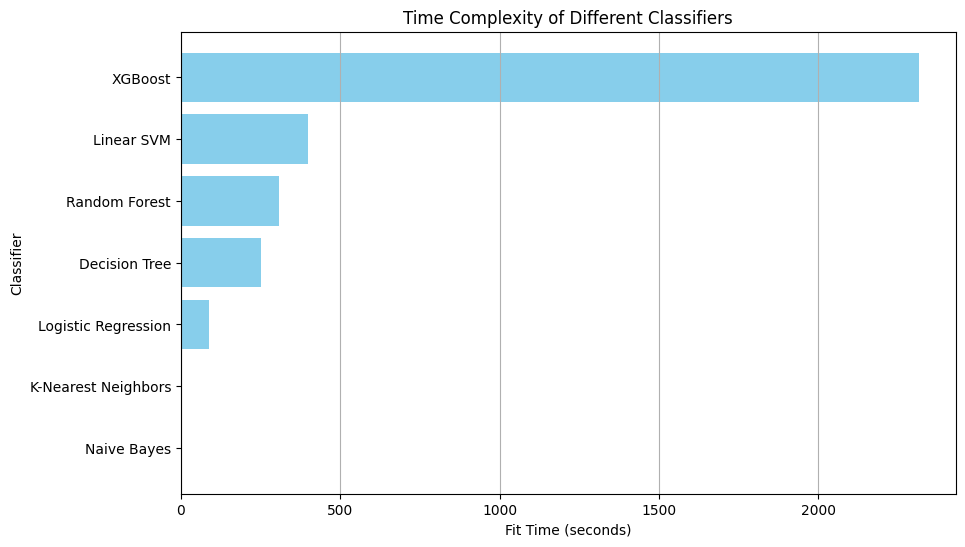

In [16]:
import matplotlib.pyplot as plt
import time

# Dictionary to store fit times for each classifier
fit_times = {}

# List of classifiers with their fit times
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    'Linear SVM': LinearSVC(),
    'XGBoost': xgb.XGBClassifier()  
}

# Iterate through classifiers
for name, classifier in classifiers.items():
    # Train the model and measure the fit time
    start_time = time.time()
    classifier.fit(X_train, y_train)
    fit_times[name] = time.time() - start_time

# Plot time complexity
plt.figure(figsize=(10, 6))
plt.barh(list(fit_times.keys()), list(fit_times.values()), color='skyblue')
plt.xlabel('Fit Time (seconds)')
plt.ylabel('Classifier')
plt.title('Time Complexity of Different Classifiers')
plt.grid(axis='x')
plt.show()


In [17]:
print(fit_times)

{'Naive Bayes': 2.601583480834961, 'K-Nearest Neighbors': 0.016028642654418945, 'Logistic Regression': 89.46510243415833, 'Decision Tree': 251.81272101402283, 'Random Forest': 307.4299867153168, 'Linear SVM': 398.90836334228516, 'XGBoost': 2315.2949545383453}


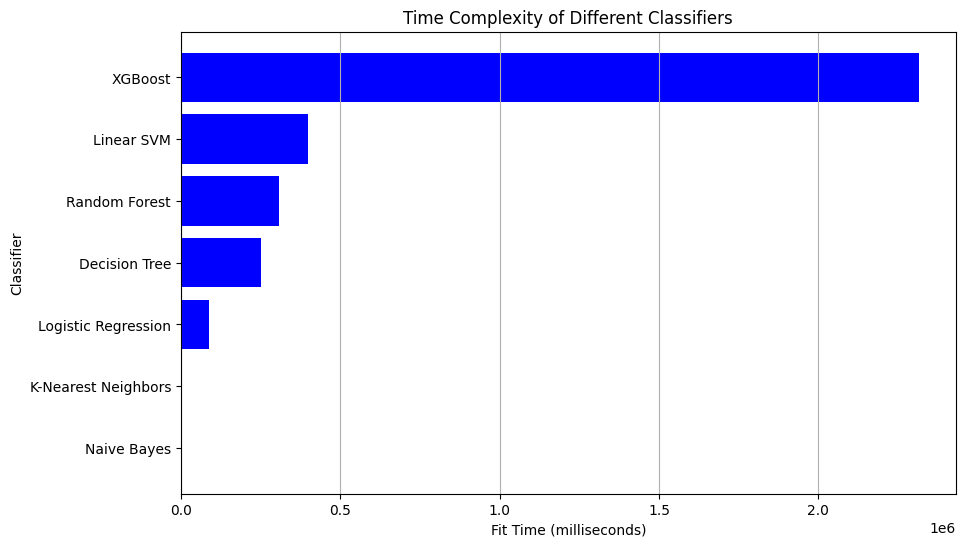

In [18]:
# Convert fit times to milliseconds
fit_times_ms = {key: value * 1000 for key, value in fit_times.items()}

# Plot time complexity in milliseconds
plt.figure(figsize=(10, 6))
plt.barh(list(fit_times_ms.keys()), list(fit_times_ms.values()), color='blue')
plt.xlabel('Fit Time (milliseconds)')
plt.ylabel('Classifier')
plt.title('Time Complexity of Different Classifiers')
plt.grid(axis='x')
plt.show()


In [19]:
print(fit_times)

{'Naive Bayes': 2.601583480834961, 'K-Nearest Neighbors': 0.016028642654418945, 'Logistic Regression': 89.46510243415833, 'Decision Tree': 251.81272101402283, 'Random Forest': 307.4299867153168, 'Linear SVM': 398.90836334228516, 'XGBoost': 2315.2949545383453}
